In [57]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
from utils.utils import load, save

In [62]:
experiment_path = r'results/' +  config['General']['Name']
data_path = experiment_path + '/' + config['General']['Sub Name'] + ".json"

In [64]:
with open(data_path, 'r') as file:
    width_to_results = json.load(file)

In [66]:
def unpack_results(width_to_results):
    x_loss_train = []
    x_loss_test = []
    x_complexity = []
    x_alpha = []
    x_parameter_count = []

    for width in width_to_results.keys():
        results = width_to_results[width]
        x_loss_train.append(np.mean(results["loss train"]))
        x_loss_test.append(np.mean(results["loss test"]))
        x_complexity.append(np.median(np.array(results["complexity"])[:,0]))

    return x_loss_train, x_loss_test, x_complexity

In [68]:
x_loss_train, x_loss_test, x_complexity = unpack_results(width_to_results)

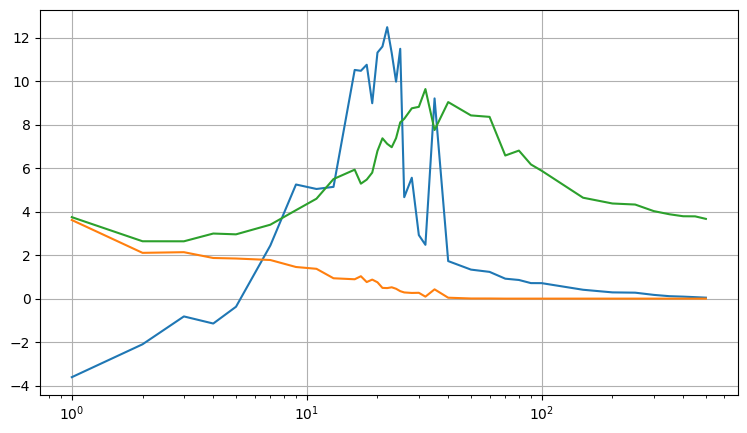

In [69]:
plt.figure(figsize=(9, 5))
plt.plot(x_width[:len(x_complexity)], np.log(x_complexity))
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_train)*10)
plt.plot(x_width[:len(x_complexity)], np.array(x_loss_test)*10)
plt.xscale('log')
plt.grid(True)

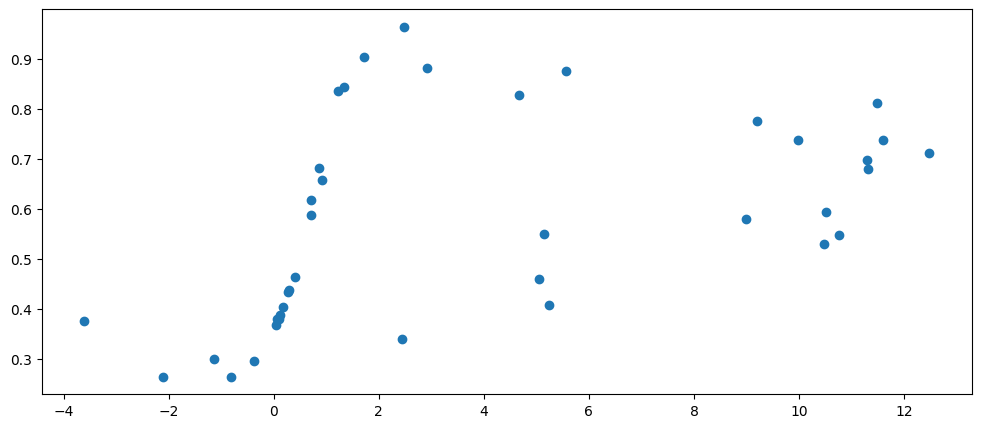

In [70]:
plt.figure(figsize=(12, 5))
plt.scatter(np.log(x_complexity), x_loss_test)
#plt.xlim((-5, 7))